In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [2]:
def distance_between_cities(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data


In [3]:
cityList  = [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[42.856255,10.516726]
             ,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656],[53.19384,18.92832]
             ,[91.912832,34.293363],[62.239233,15.82732]]    
val = distance_between_cities(cityList).values()


In [4]:
print(val)

dict_values([7.699756348069267, 10.507479614123506, 38.849307467271956, 44.91546944493401, 4.409775601291549, 9.487142456541129, 26.389330437524496, 41.65627069107258, 34.950210610104335, 15.604780971964454])


In [5]:
def total_distance(cities):
    total = sum(distance_between_cities(cities).values())
    return total
total_distance(cityList)

234.4695236428973

In [6]:
def generatePath(cities):
    path = random.sample(cities, len(cities))
    return path
list= generatePath(cityList)
print(list)

[[80.9231262, 26.8392792], [62.239233, 15.82732], [77.216721, 28.6448], [53.19384, 18.92832], [77.580643, 12.972442], [74.797371, 34.083656], [91.912832, 34.293363], [85.158875, 25.612677], [72.88261, 19.07283], [42.856255, 10.516726]]


In [7]:
import numpy as np
city_names = ['Balige', 'Laguboti', 'Tampahan', 'Silaen','Uluan','Lumban Julu',
              'Porsea','Siantar Narumonda','Sigumpar','Ajibata']
def plot_pop(cities):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    j = [77.580643,72.88261,77.216721,42.856255,85.158875,80.9231262,74.797371,53.19384,91.912832,62.239233]
    k = [12.972442,19.07283,28.644800,10.516726,25.612677,26.8392792,34.083656,18.92832,34.293363,15.82732]
   
    
    for i, txt in enumerate(city_names):
        plt.annotate(txt, (j[i], k[i]),horizontalalignment='center', 
            #verticalalignment='bottom',
                    )
    plt.show()
    return 

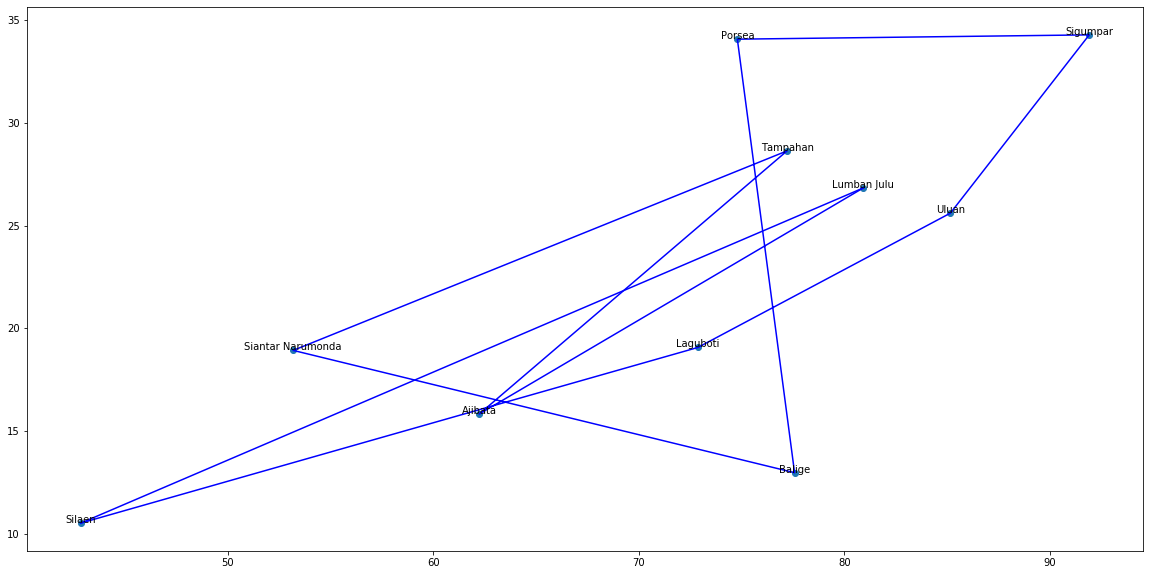

In [8]:
plot_pop(list)

In [9]:
def initialPopulation(cities, populationSize):
    population = [generatePath(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(cityList,20)

In [10]:
for idx, pop_plot in enumerate (population):
    print('Initial Population '+ str(idx),pop_plot)

Initial Population 0 [[62.239233, 15.82732], [72.88261, 19.07283], [53.19384, 18.92832], [91.912832, 34.293363], [77.216721, 28.6448], [74.797371, 34.083656], [77.580643, 12.972442], [80.9231262, 26.8392792], [85.158875, 25.612677], [42.856255, 10.516726]]
Initial Population 1 [[72.88261, 19.07283], [74.797371, 34.083656], [85.158875, 25.612677], [91.912832, 34.293363], [62.239233, 15.82732], [77.580643, 12.972442], [42.856255, 10.516726], [53.19384, 18.92832], [80.9231262, 26.8392792], [77.216721, 28.6448]]
Initial Population 2 [[74.797371, 34.083656], [91.912832, 34.293363], [72.88261, 19.07283], [53.19384, 18.92832], [80.9231262, 26.8392792], [77.580643, 12.972442], [77.216721, 28.6448], [42.856255, 10.516726], [85.158875, 25.612677], [62.239233, 15.82732]]
Initial Population 3 [[42.856255, 10.516726], [74.797371, 34.083656], [77.216721, 28.6448], [62.239233, 15.82732], [80.9231262, 26.8392792], [91.912832, 34.293363], [77.580643, 12.972442], [85.158875, 25.612677], [72.88261, 19.07

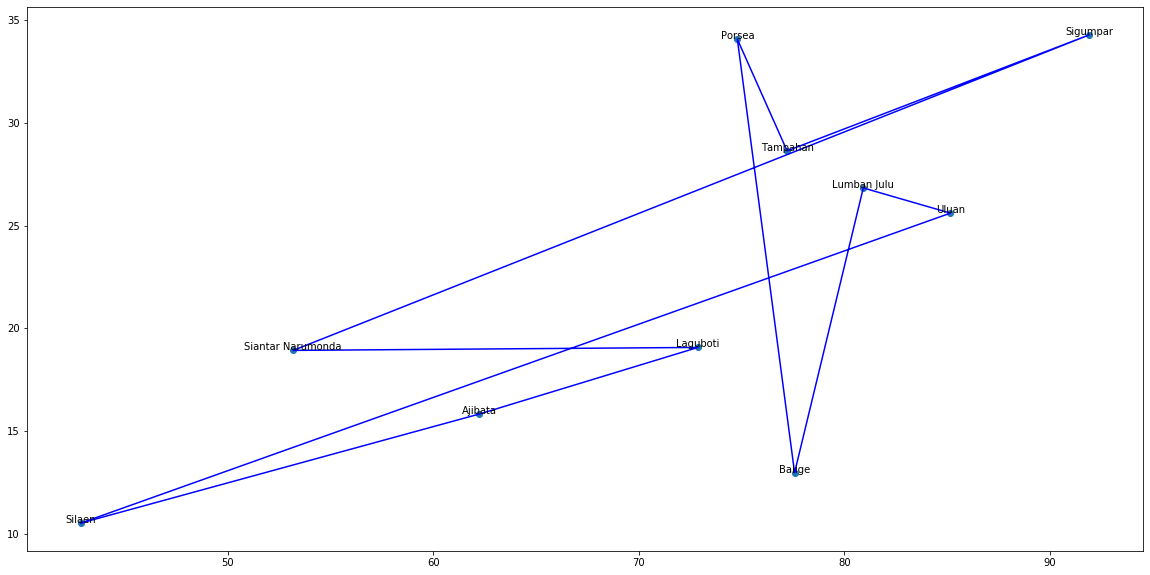

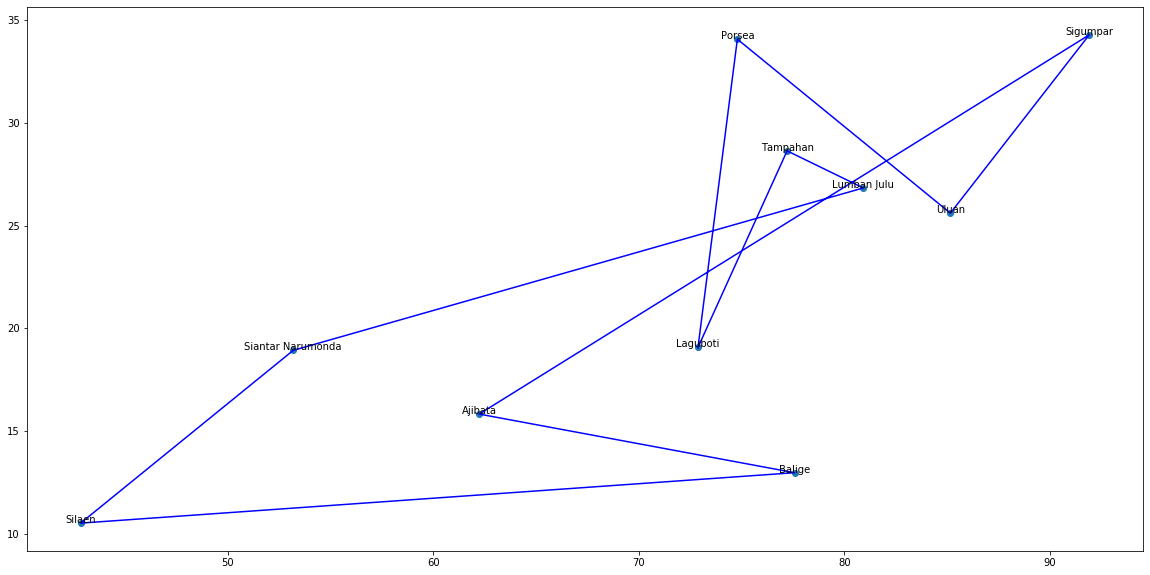

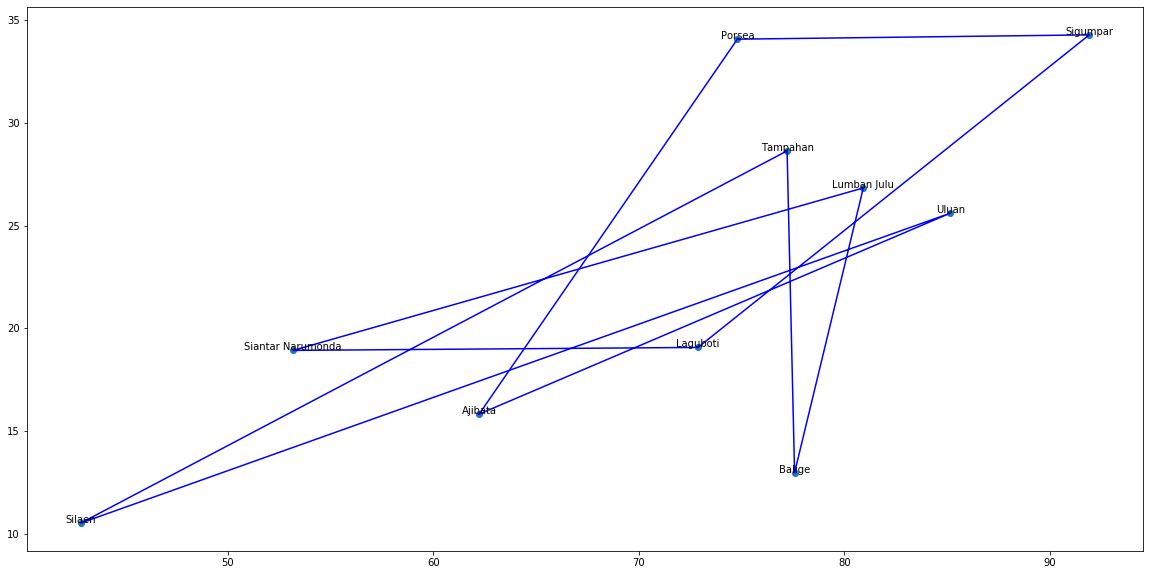

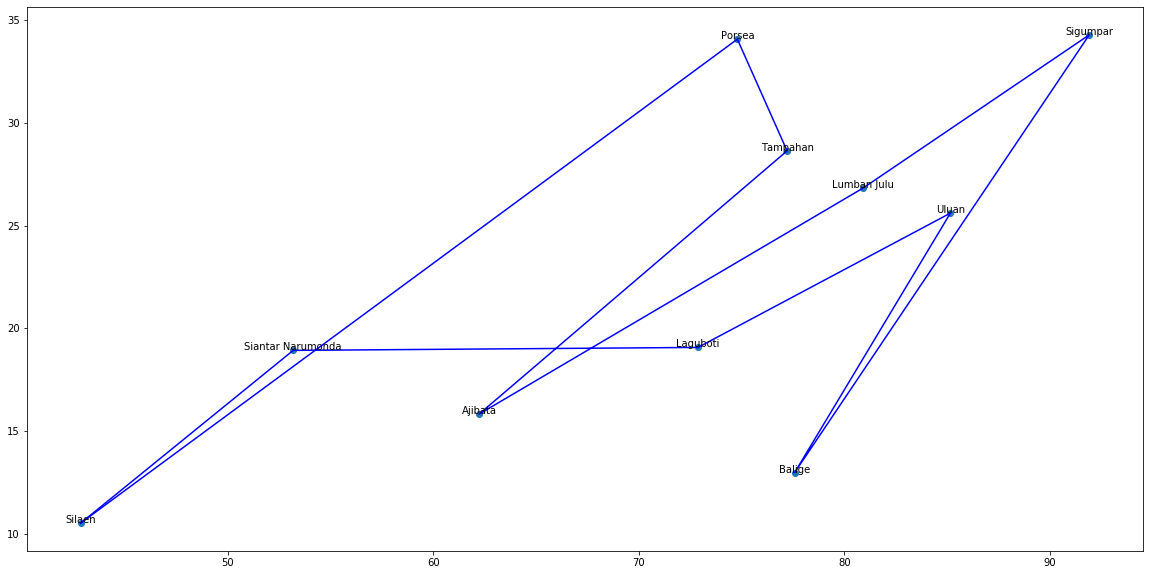

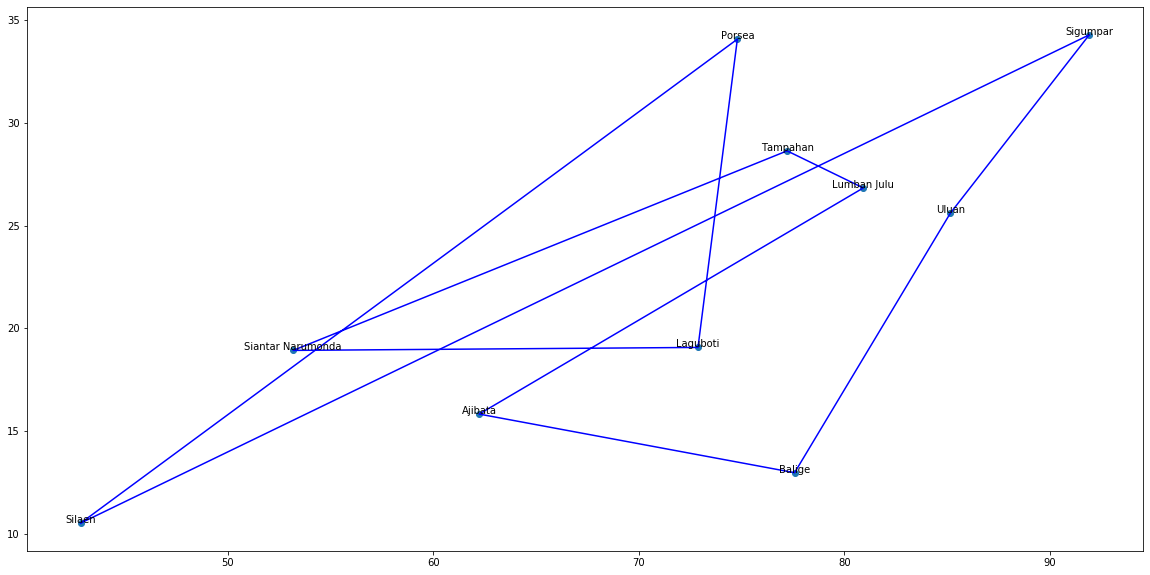

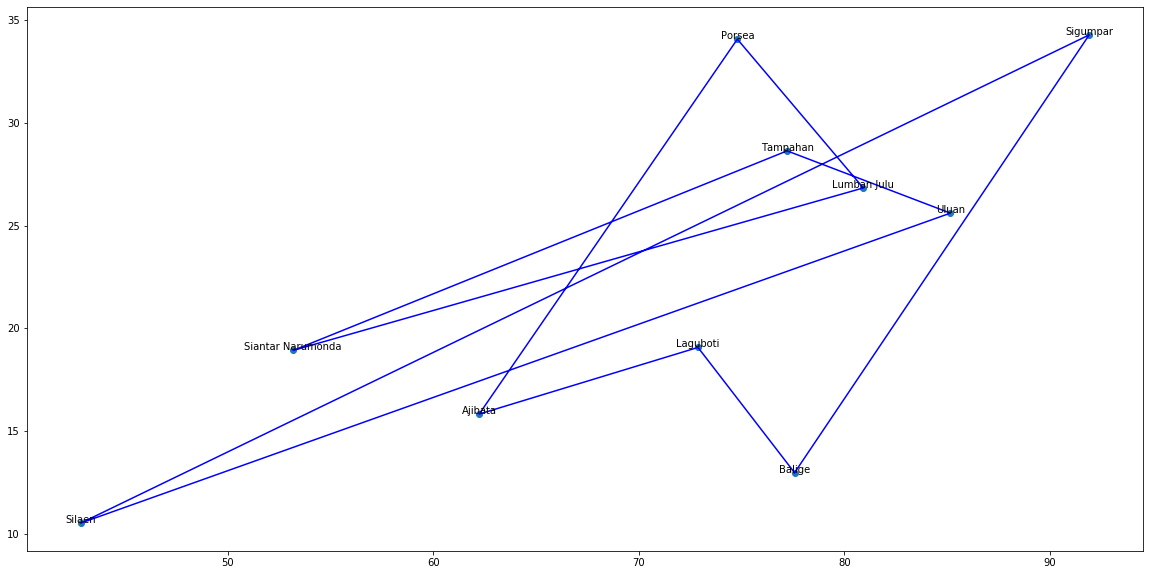

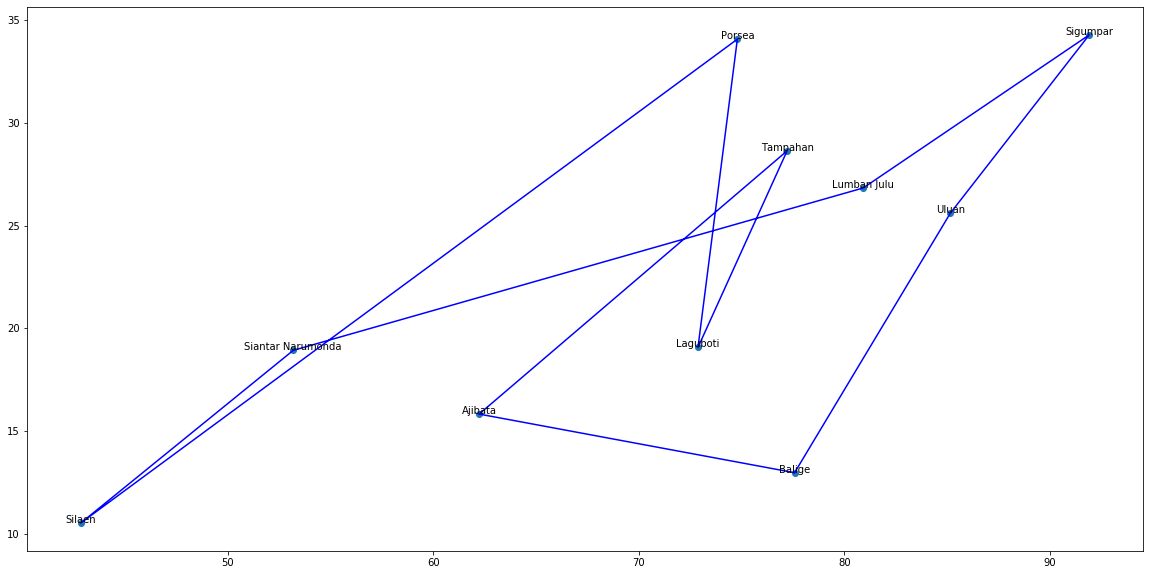

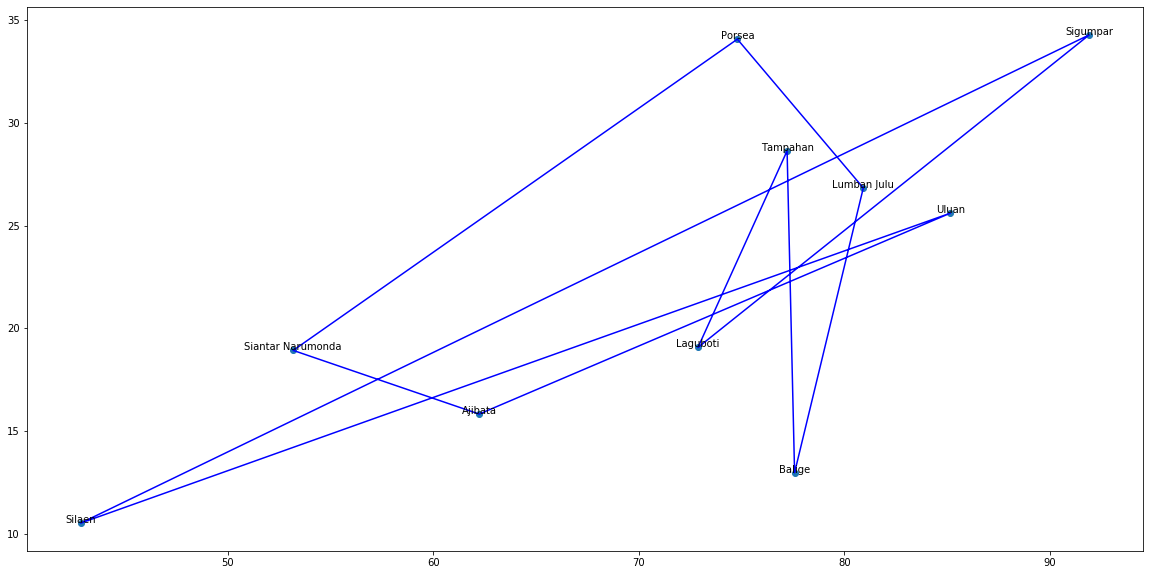

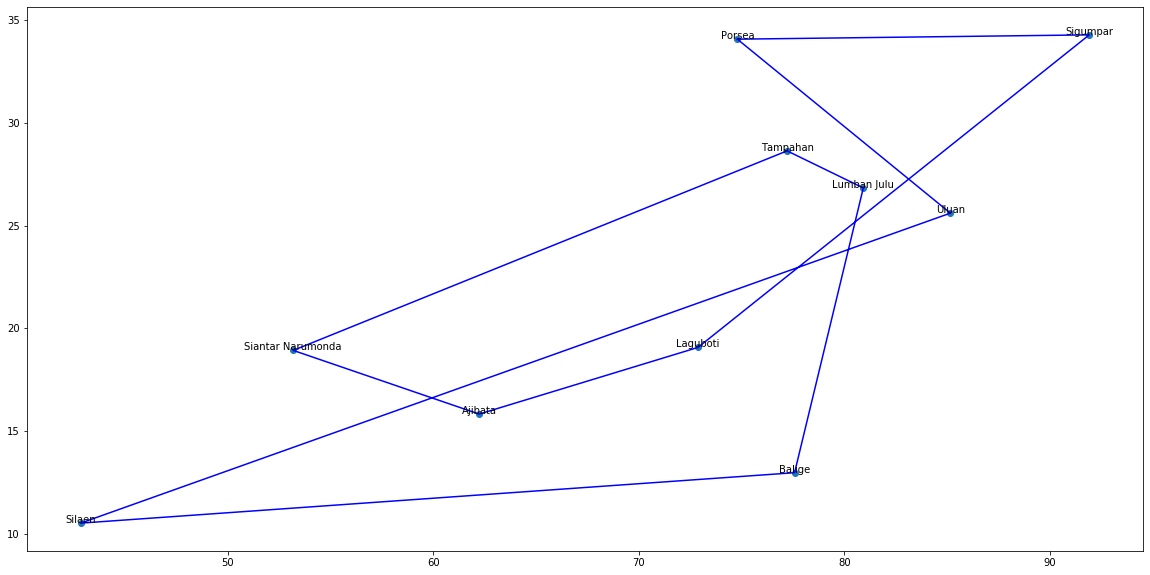

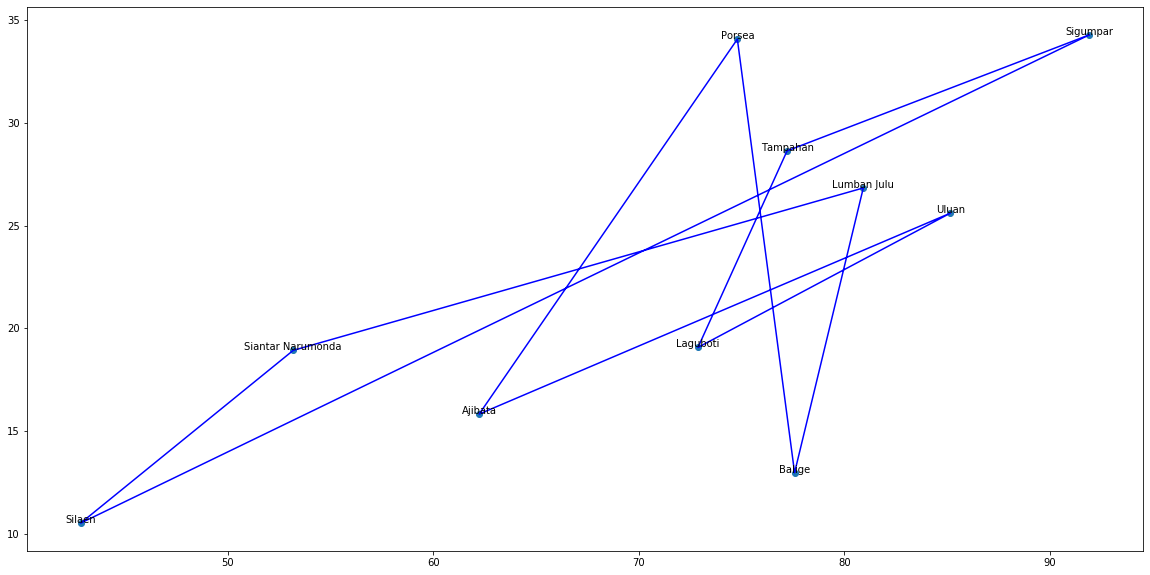

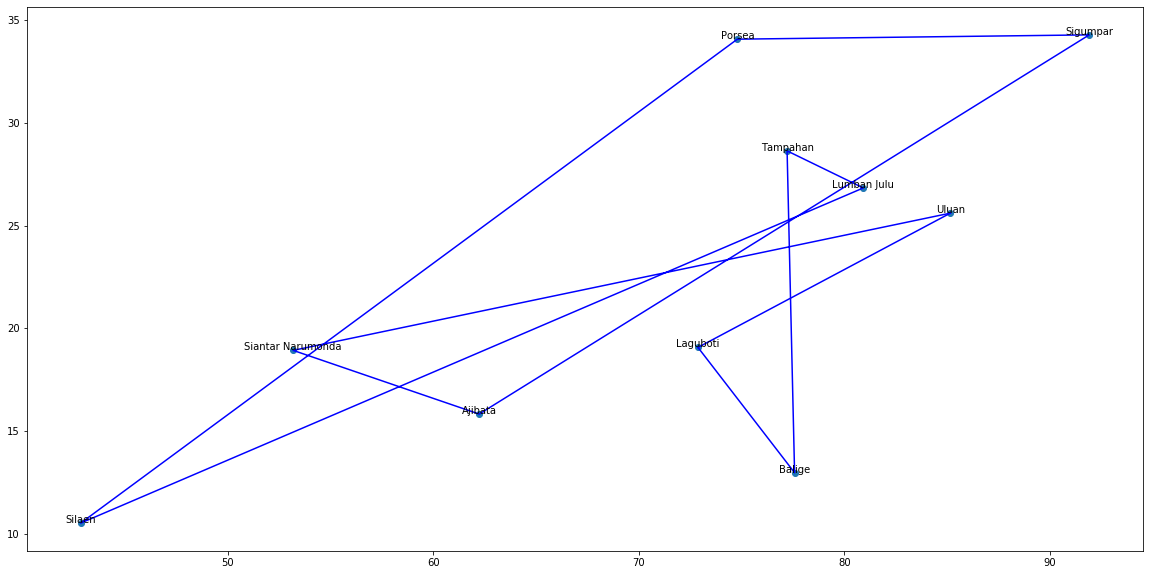

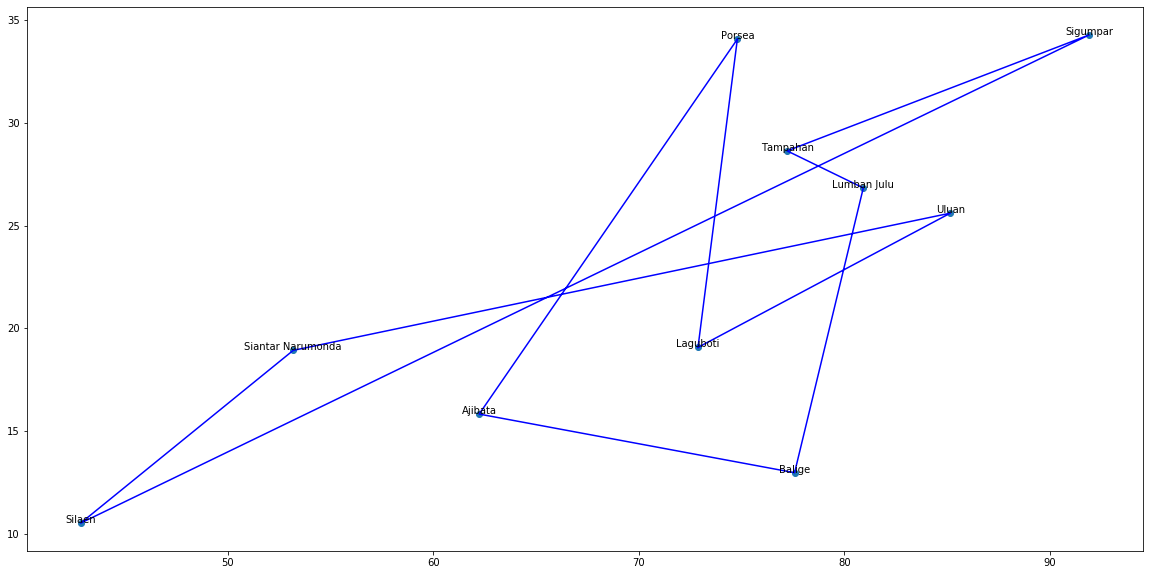

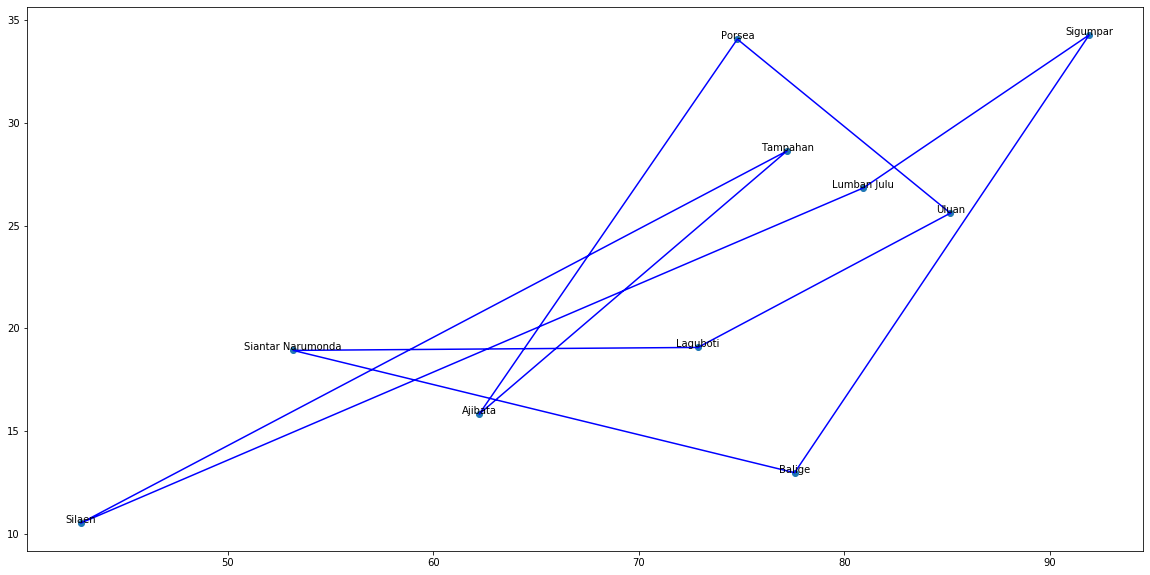

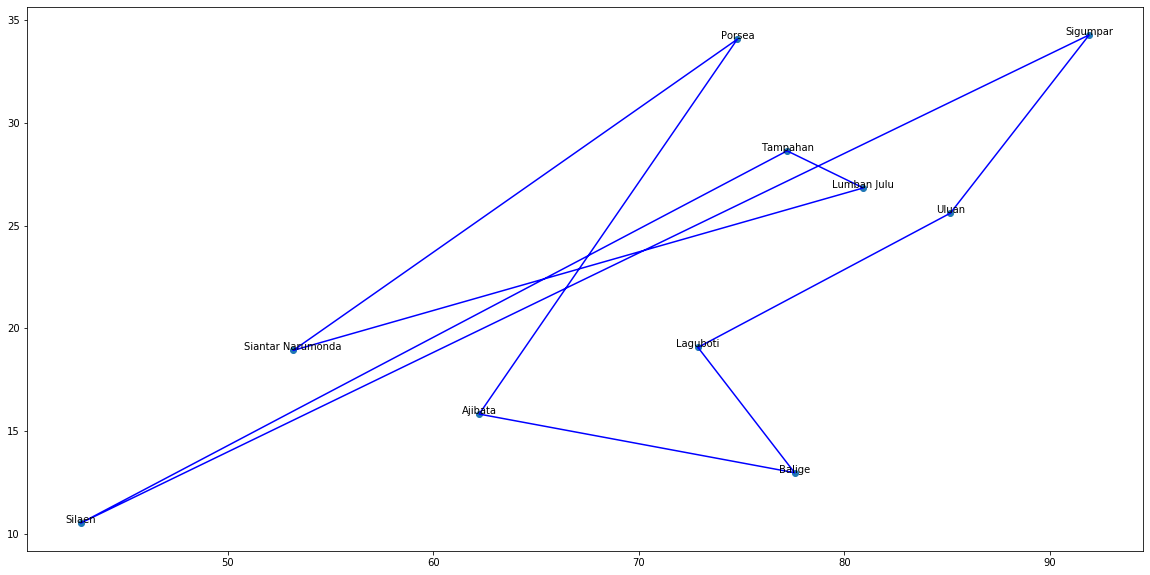

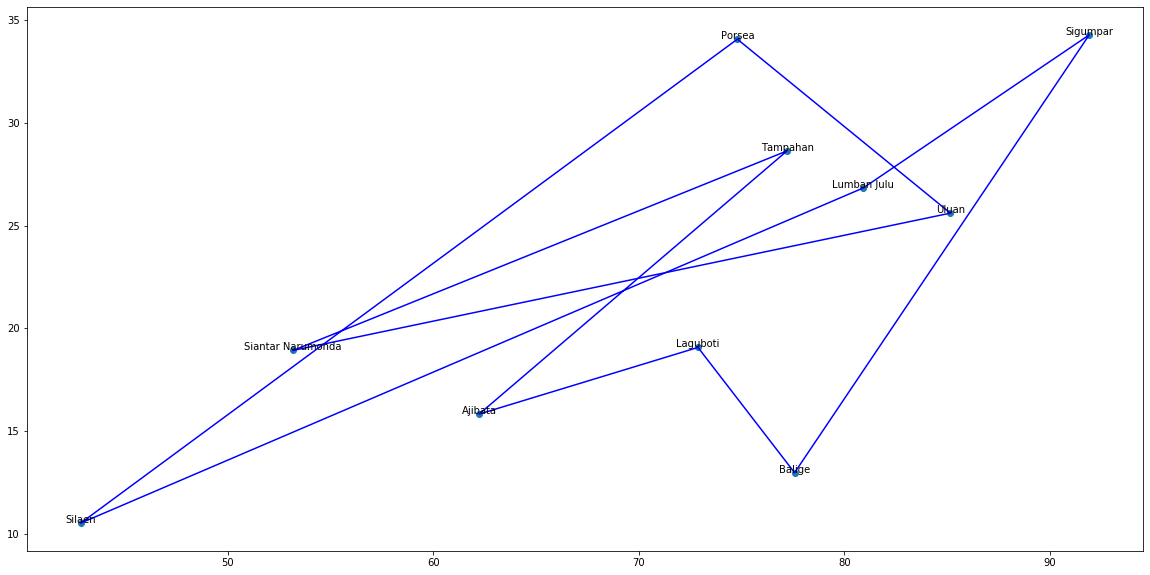

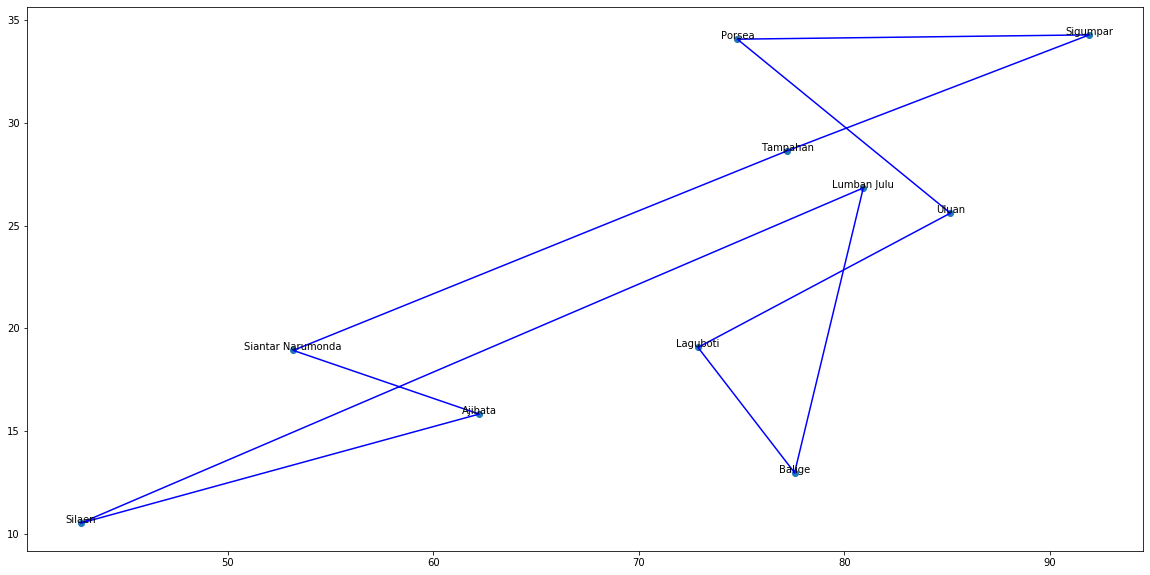

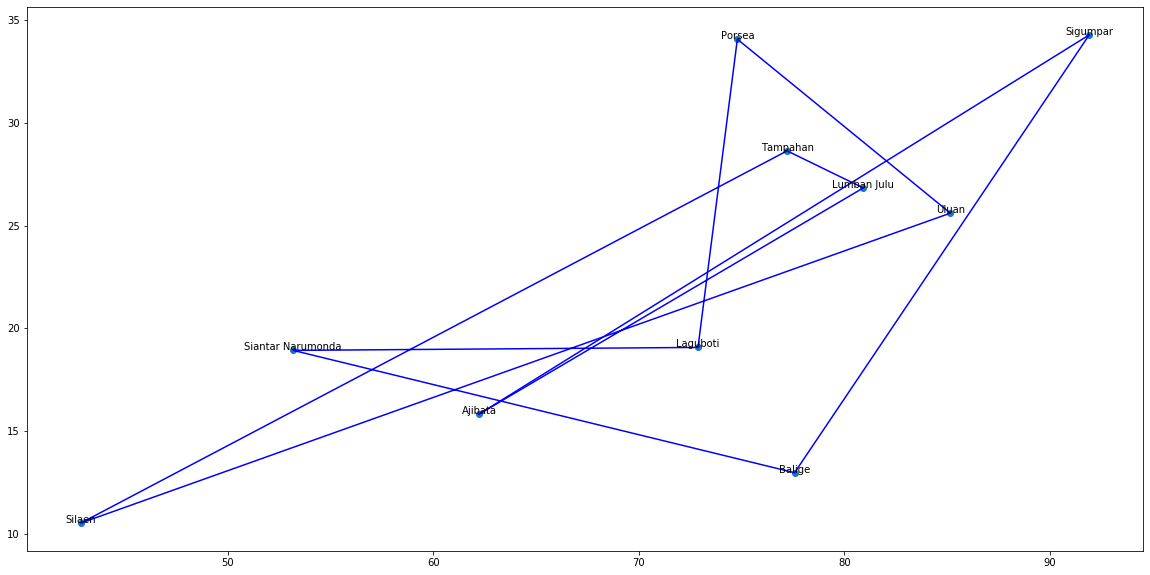

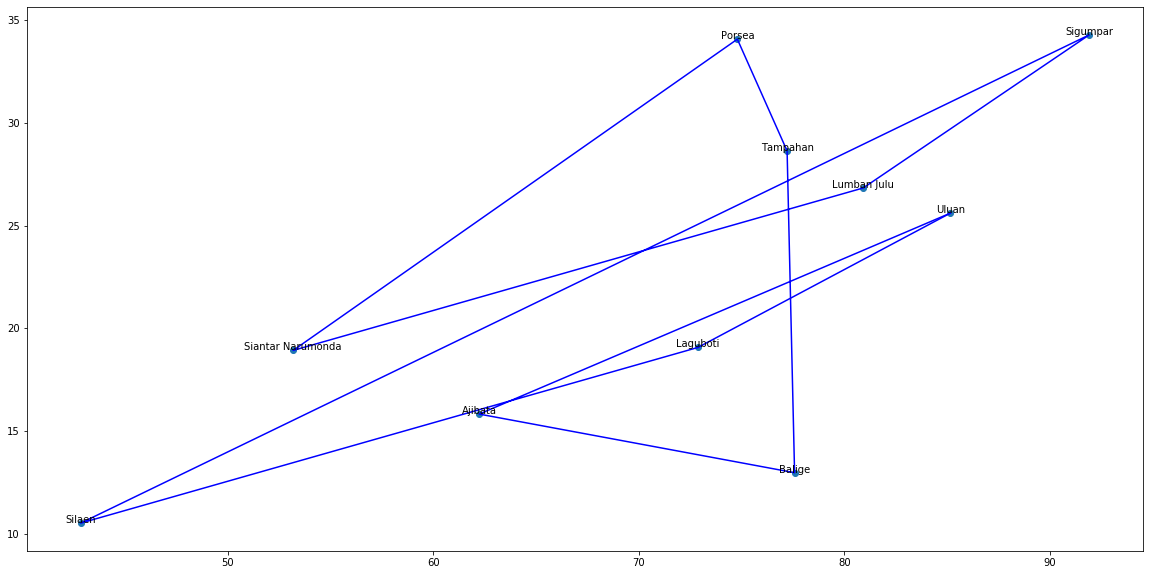

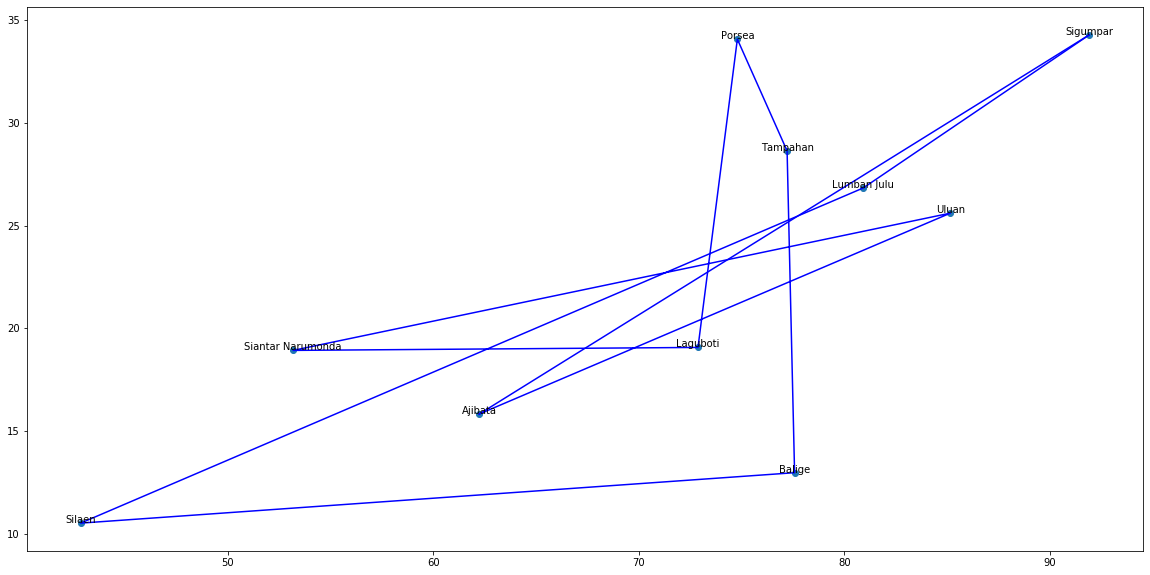

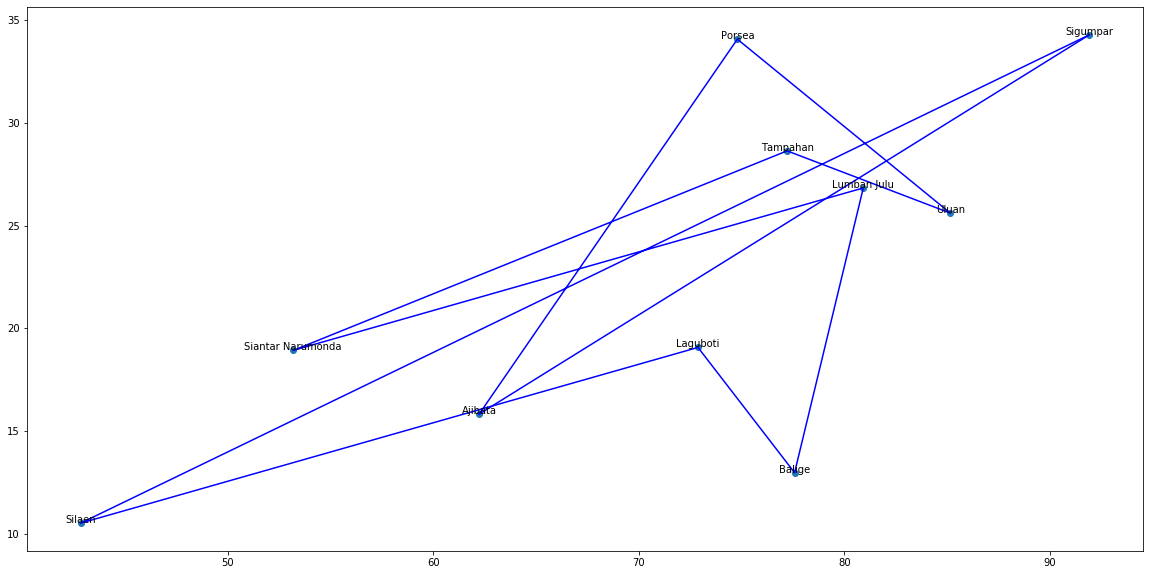

In [11]:
for pop_plot in population:
    plot_pop(pop_plot)

In [12]:
def path_fitness(cities):
    total_dis = total_distance(cities)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
path_fitness(cityList)

0.004264946609961233

In [13]:
def rankPathes(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
rankPathes(population)

[(15, 0.0055831745018556115),
 (1, 0.005504361994133619),
 (6, 0.005499609355741469),
 (3, 0.005328175045745404),
 (0, 0.005021336237812663),
 (8, 0.00501040194178378),
 (11, 0.004964375770852184),
 (10, 0.004612390664983862),
 (9, 0.004556287827789177),
 (4, 0.004502555369371694),
 (13, 0.004482630169009513),
 (17, 0.0043420588227414654),
 (14, 0.00433696053034929),
 (12, 0.004288250645138812),
 (7, 0.004262455928628362),
 (18, 0.004193085231244955),
 (5, 0.004186836688403622),
 (19, 0.004141764962893669),
 (16, 0.0041063629036761995),
 (2, 0.003987319543182856)]

In [14]:
def perform_selection(pop, eliteSize):
    #output = rankPathes(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution. 
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
                
    return selected_values

In [15]:
out11 = rankPathes(population)
selected_values = perform_selection(out11,5)
print(selected_values)

[15, 1, 6, 3, 0, 17, 14, 15, 12, 4, 17, 11, 15, 1, 7, 6, 14, 7, 3, 1]


In [16]:
def do_mating_pool(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = do_mating_pool(population, selected_values)

In [17]:
def do_breed(first_parent, second_parent):
    generation_1= int(random.random() * len(first_parent))
    generation_2 = int(random.random() * len(second_parent))
    
    first_generation = min(generation_1, generation_2)
    last_generation = max(generation_1, generation_2)

    tot_parent1 = [first_parent[i] for i in range(first_generation, last_generation)]
    tot_parent2 = [i for i in second_parent if i not in tot_parent1]

    tot = tot_parent1 + tot_parent2
    return tot

In [18]:
def do_breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [do_breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
do_breed_population(mp,2)

[[[80.9231262, 26.8392792],
  [42.856255, 10.516726],
  [62.239233, 15.82732],
  [53.19384, 18.92832],
  [77.216721, 28.6448],
  [91.912832, 34.293363],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [91.912832, 34.293363],
  [62.239233, 15.82732],
  [77.580643, 12.972442],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [77.216721, 28.6448]],
 [[77.580643, 12.972442],
  [62.239233, 15.82732],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [74.797371, 34.083656],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [91.912832, 34.293363],
  [85.158875, 25.612677]],
 [[85.158875, 25.612677],
  [42.856255, 10.516726],
  [72.88261, 19.07283],
  [53.19384, 18.92832],
  [91.912832, 34.293363],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442],
  [62.239233, 15.82732],
  [

In [19]:
def do_mutatation(indiv, mutat_rate):
    for exchanged in range(len(indiv)):
        if(random.random() < mutat_rate):
            exchanged_with = int(random.random() * len(indiv))
            
            city1 = indiv[exchanged]
            city2 = indiv[exchanged_with]
            
            indiv[exchanged] = city2
            indiv[exchanged_with] = city1
    return indiv

In [20]:
def do_mutatation_pop(population, mutat_rate):
    mutated_population = [do_mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
do_mutatation_pop(population, 0.01)

[[[62.239233, 15.82732],
  [72.88261, 19.07283],
  [53.19384, 18.92832],
  [91.912832, 34.293363],
  [77.216721, 28.6448],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [42.856255, 10.516726]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [91.912832, 34.293363],
  [62.239233, 15.82732],
  [77.580643, 12.972442],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [77.216721, 28.6448]],
 [[74.797371, 34.083656],
  [91.912832, 34.293363],
  [72.88261, 19.07283],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442],
  [77.216721, 28.6448],
  [42.856255, 10.516726],
  [85.158875, 25.612677],
  [62.239233, 15.82732]],
 [[42.856255, 10.516726],
  [74.797371, 34.083656],
  [77.216721, 28.6448],
  [62.239233, 15.82732],
  [80.9231262, 26.8392792],
  [91.912832, 34.293363],
  [77.580643, 12.972442],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
 

In [21]:
def get_following_gen(existing_gen, eliteSize, mutat_rate):
    pop = rankPathes(existing_gen)
    
    selected_values = perform_selection(pop, eliteSize)
   
    my_mating_pool = do_mating_pool(existing_gen, selected_values)
    tot = do_breed_population(my_mating_pool, eliteSize)
    following_gen = do_mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
get_following_gen(population, 5, 0.01)

[[[72.88261, 19.07283],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [85.158875, 25.612677],
  [91.912832, 34.293363],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442],
  [62.239233, 15.82732],
  [74.797371, 34.083656]],
 [[80.9231262, 26.8392792],
  [42.856255, 10.516726],
  [62.239233, 15.82732],
  [53.19384, 18.92832],
  [77.216721, 28.6448],
  [91.912832, 34.293363],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [91.912832, 34.293363],
  [62.239233, 15.82732],
  [77.580643, 12.972442],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [77.216721, 28.6448]],
 [[62.239233, 15.82732],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [74.797371, 34.083656],
  [42.856255, 10.516726],
  [53.19384, 18.92832],
  [80.9231262, 26.8392792],
  [91.912832, 34.293363],
  [85.158875, 25.612677],
  [

In [22]:
#cityList  =  [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             #,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]  
#city_names =['Balige', 'Laguboti', 'Muara', 'Silaen','Tarutung','Siborong-borong','Porsea']
def get_names(result_lst, cities, name_lst):
    names = []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(cities):
            if value == v:
                names.append(name_lst[i])
    return names

Incipient distance: 146.78604874015048
Eventual distance: 127.73224066652291
[(0, 'Sigumpar'), (1, 'Uluan'), (2, 'Balige'), (3, 'Laguboti'), (4, 'Ajibata'), (5, 'Silaen'), (6, 'Siantar Narumonda'), (7, 'Porsea'), (8, 'Tampahan'), (9, 'Lumban Julu')]


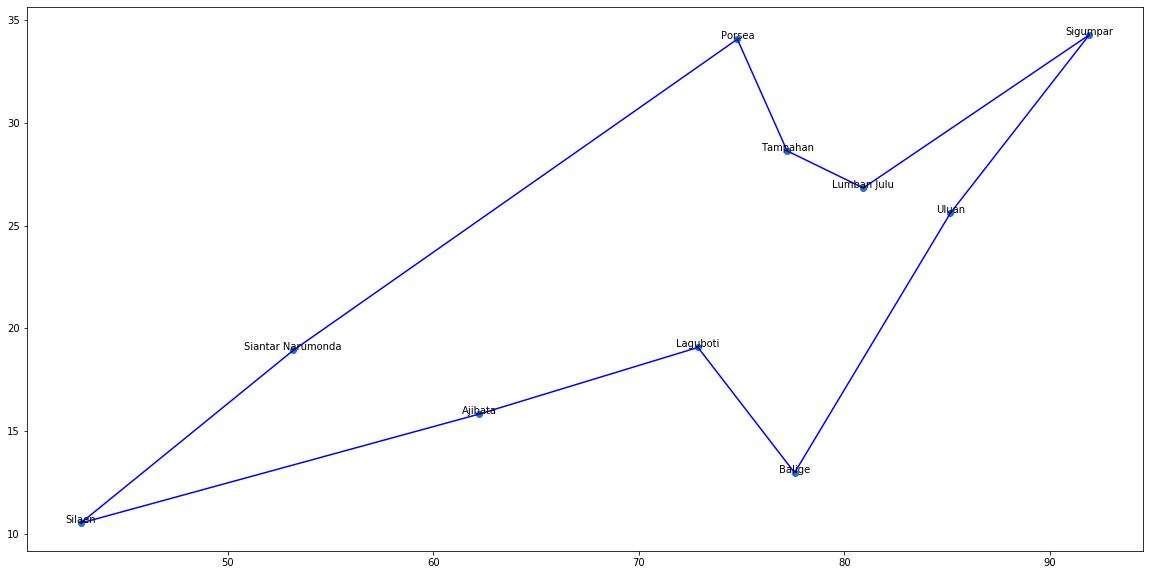

In [23]:
def GA(city_names,cities, population_size, eliteSize, mutat_rate, generations):
    population = initialPopulation(cities,population_size)
    #print(population_)
    print("Incipient distance: " + str(1 / rankPathes(population)[0][1]))
    for i in range(generations):
        population = get_following_gen(population, eliteSize, mutat_rate)
        #print(population)
    
    print("Eventual distance: " + str(1 / rankPathes(population)[0][1]))
    optimal_route_id = rankPathes(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_cities = get_names(optimal_route,cities,city_names)
    print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_pop(optimal_route)
    return optimal_route

result_lst = GA(city_names,cityList, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)

In [24]:
print(result_lst)

[[91.912832, 34.293363], [85.158875, 25.612677], [77.580643, 12.972442], [72.88261, 19.07283], [62.239233, 15.82732], [42.856255, 10.516726], [53.19384, 18.92832], [74.797371, 34.083656], [77.216721, 28.6448], [80.9231262, 26.8392792]]
